In [1]:
import os 
import numpy as np 
import networkx as nx
import networkx.algorithms.community.quality as nxq
import matplotlib.pyplot as plt 
import warnings 
warnings.simplefilter('ignore')

In [2]:
def main_f(file, fitness, m = None):
    try :
        G = nx.read_gml(file)
    except:
        G = nx.read_gml(file, label='id')
        

    if fitness == nxq.modularity:   
        best_communities = nx.community.greedy_modularity_communities(G)
    else:
        comm_gen = nx.community.girvan_newman(G)
        max_mod = -1
        best_communities = None
        for communities in comm_gen:
            if m is not None: mod = fitness(G, communities)[m]
            else: mod = fitness(G, communities)
            if mod > max_mod:
                max_mod = mod
                best_communities = communities

    print(best_communities)
    communities = []
    for i in G.nodes:
        for j in range(len(best_communities)):
            if i in best_communities[j]:
                communities.append(j+1)
                break

    print(communities)
    pos = nx.spring_layout(G)  
    plt.figure(figsize=(15, 15)) 
    plt.title("Found communities")
    nx.draw_networkx_nodes(G, pos, node_size = 600, cmap = plt.cm.RdYlBu, node_color = communities)
    nx.draw_networkx_edges(G, pos, alpha = 0.3)
    nx.draw_networkx_labels(G, pos)
    plt.show(G)

    print("Fitness: ", fitness(G, best_communities))

[frozenset({'Fish', 'Beak', 'SN4', 'Fork', 'SN96', 'Hook', 'TSN103', 'SN63', 'Zipfel', 'Bumper', 'TR77', 'SN9', 'TSN83', 'TR99', 'Grin', 'TR88', 'Shmuddel', 'TR120', 'Stripes', 'Scabs', 'Thumper', 'Whitetip', 'Kringel'}), frozenset({'TR82', 'Wave', 'Knit', 'Web', 'SN90', 'MN23', 'Oscar', 'Notch', 'Number1', 'PL', 'Mus', 'Feather', 'DN63', 'Ripplefluke', 'Zig', 'DN16', 'Beescratch', 'Upbang', 'DN21', 'Quasi', 'Jet', 'Gallatin'}), frozenset({'Trigger', 'Five', 'SMN5', 'Cross', 'Jonah', 'MN83', 'Topless', 'MN105', 'Zap', 'Double', 'Vau', 'CCL', 'Patchback', 'Haecksel', 'MN60'}), frozenset({'SN89', 'SN100'})]
[1, 2, 1, 3, 3, 2, 2, 2, 3, 2, 1, 3, 1, 2, 1, 3, 1, 2, 3, 2, 1, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 4, 1, 1, 4, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 2, 3, 2, 2, 1, 3, 2, 1]


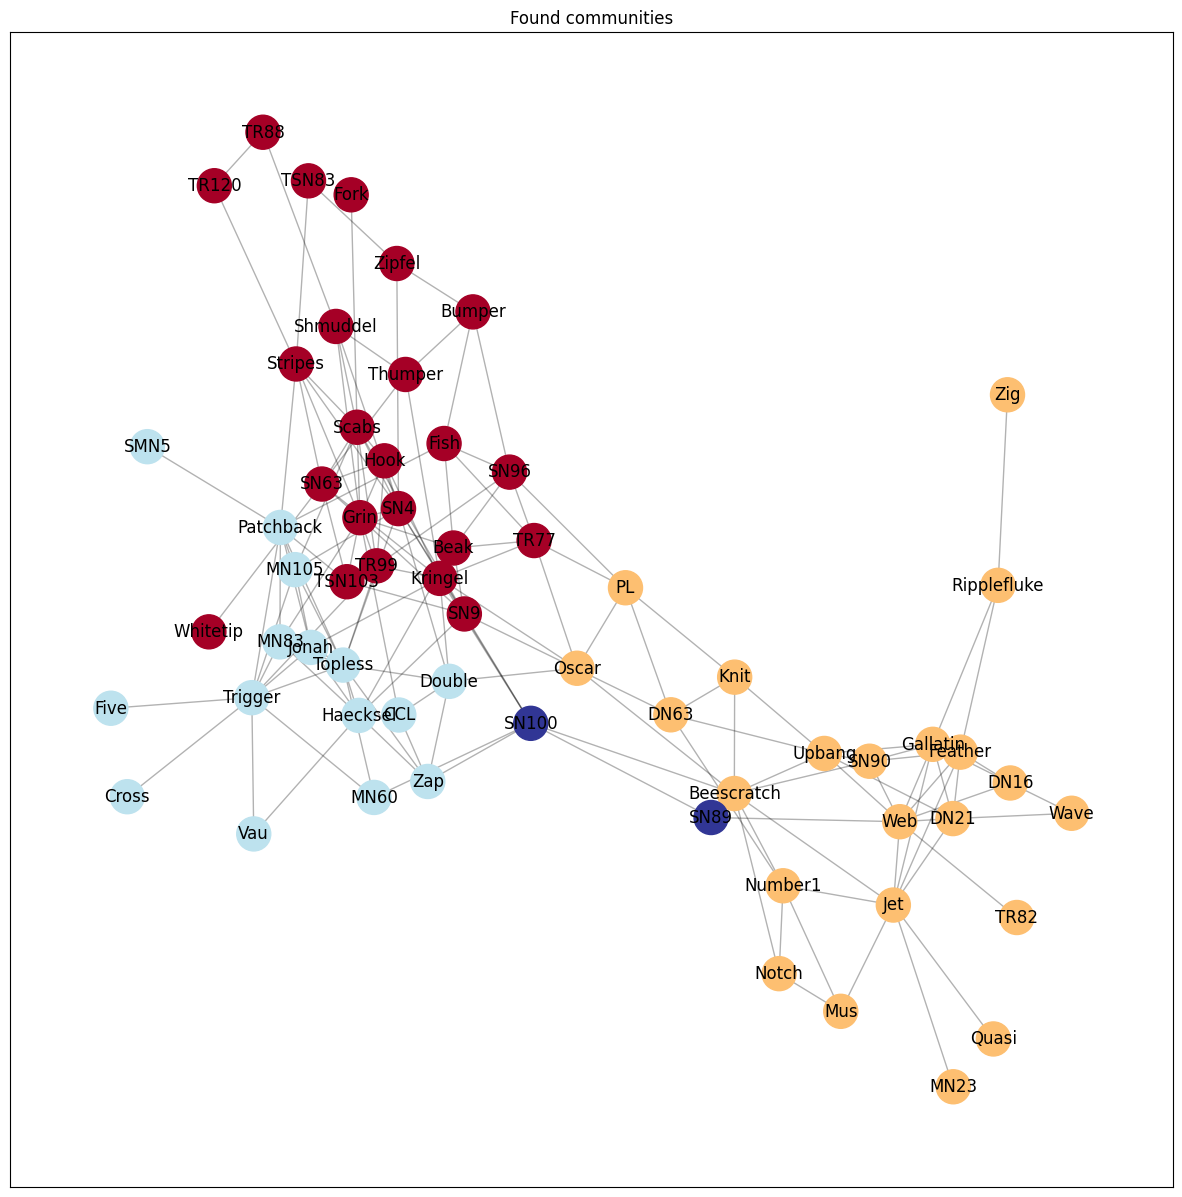

Fitness:  0.4954906847039278


In [3]:
main_f("communityDetection/data/dolphins/dolphins.gml", nxq.modularity)

In [4]:
main_f("communityDetection/data/football/football.gml", nxq.partition_quality, 0)

NetworkXError: edge #51 (27--17) is duplicated

({1, 2, 4, 8, 14}, {3, 28, 29}, {11, 5}, {17, 6, 7}, {33, 34, 9, 24, 30, 31}, {10}, {12}, {13}, {15}, {16}, {18}, {19}, {20}, {21}, {22}, {23}, {32, 25, 26}, {27})
[1, 1, 2, 1, 3, 4, 4, 1, 5, 6, 3, 7, 8, 1, 9, 10, 4, 11, 12, 13, 14, 15, 16, 5, 17, 17, 18, 2, 2, 5, 5, 17, 5, 5]


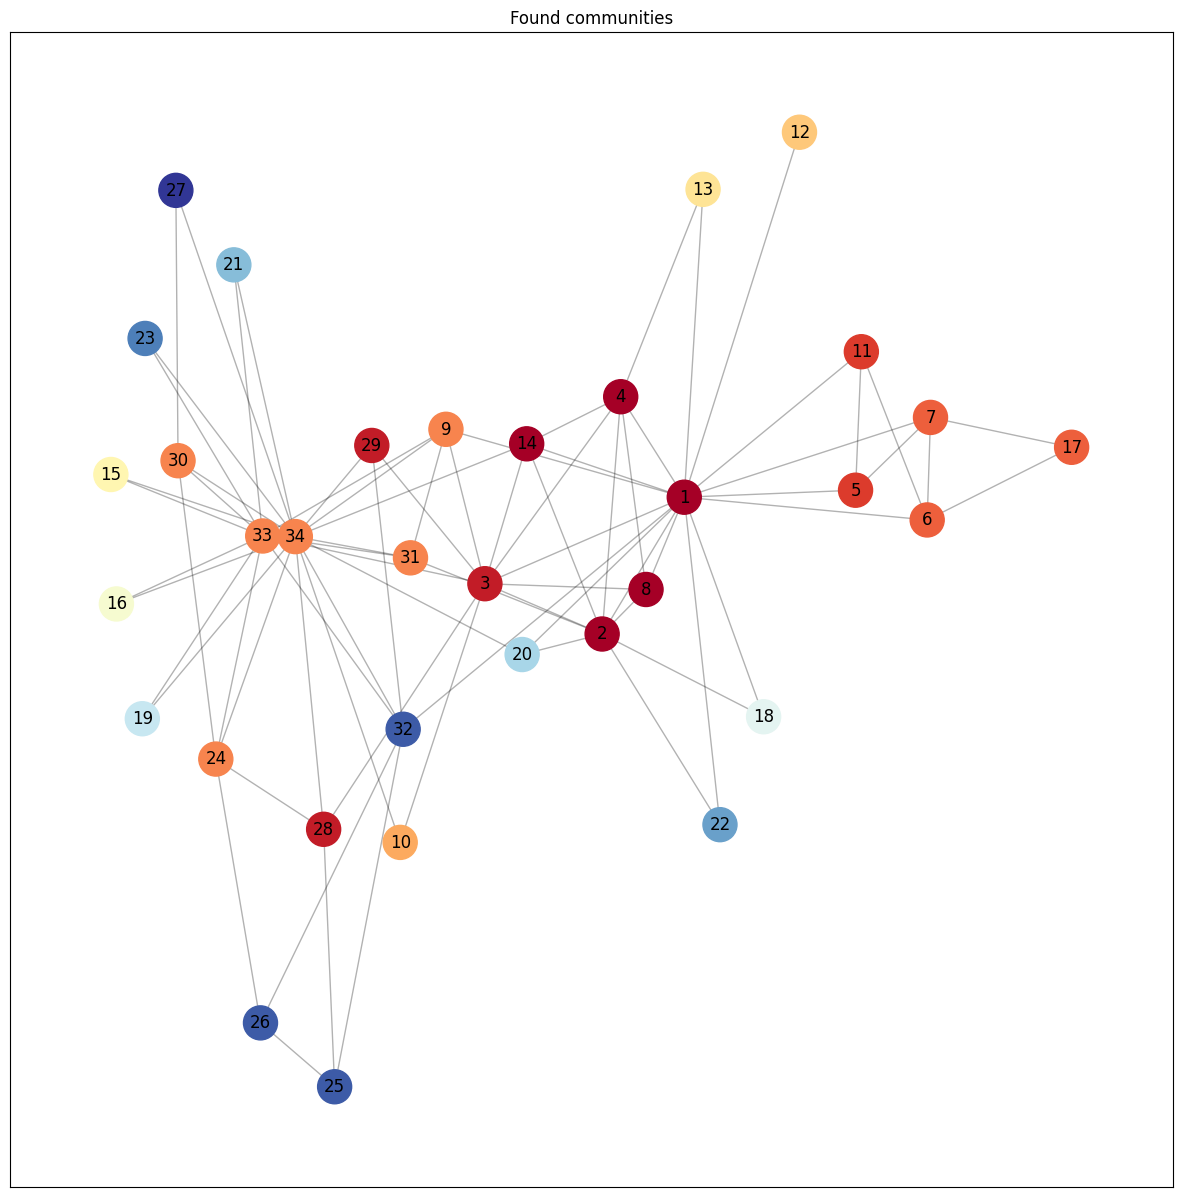

Fitness:  (0.3717948717948718, 0.9019607843137255)


In [5]:
main_f("communityDetection/data/karate/karate.gml", nxq.partition_quality, 1)

[frozenset({'Dangerous Dimplomacy', 'Bias', 'Why America Slept', 'Meant To Be', 'Let Freedom Ring', 'Why Courage Matters', 'Arrogance', 'Betrayal', 'Persecution', 'The Real America', 'Legacy', 'Sleeping With the Devil', 'A National Party No More', 'The French Betrayal of America', 'Power Plays', 'Useful Idiots', 'Bush Country', 'Slander', 'Tales from the Left Coast', "The O'Reilly Factor", 'Ghost Wars', 'Breakdown', 'The Official Handbook Vast Right Wing Conspiracy', 'Spin Sisters', "Hillary's Scheme", '1000 Years for Revenge', 'Endgame', 'Off with Their Heads', 'Bush vs. the Beltway', 'Losing Bin Laden', 'Those Who Trespass', "Charlie Wilson's War", "Rumsfeld's War", 'We Will Prevail', 'Fighting Back', 'Dereliction of Duty', 'The Man Who Warned America', "Who's Looking Out for You?", 'The Savage Nation', 'The Enemy Within', 'Hollywood Interrupted', 'Shut Up and Sing', 'Ten Minutes from Normal', 'Give Me a Break', 'The Right Man', 'The Death of Right and Wrong', 'The Third Terrorist', 

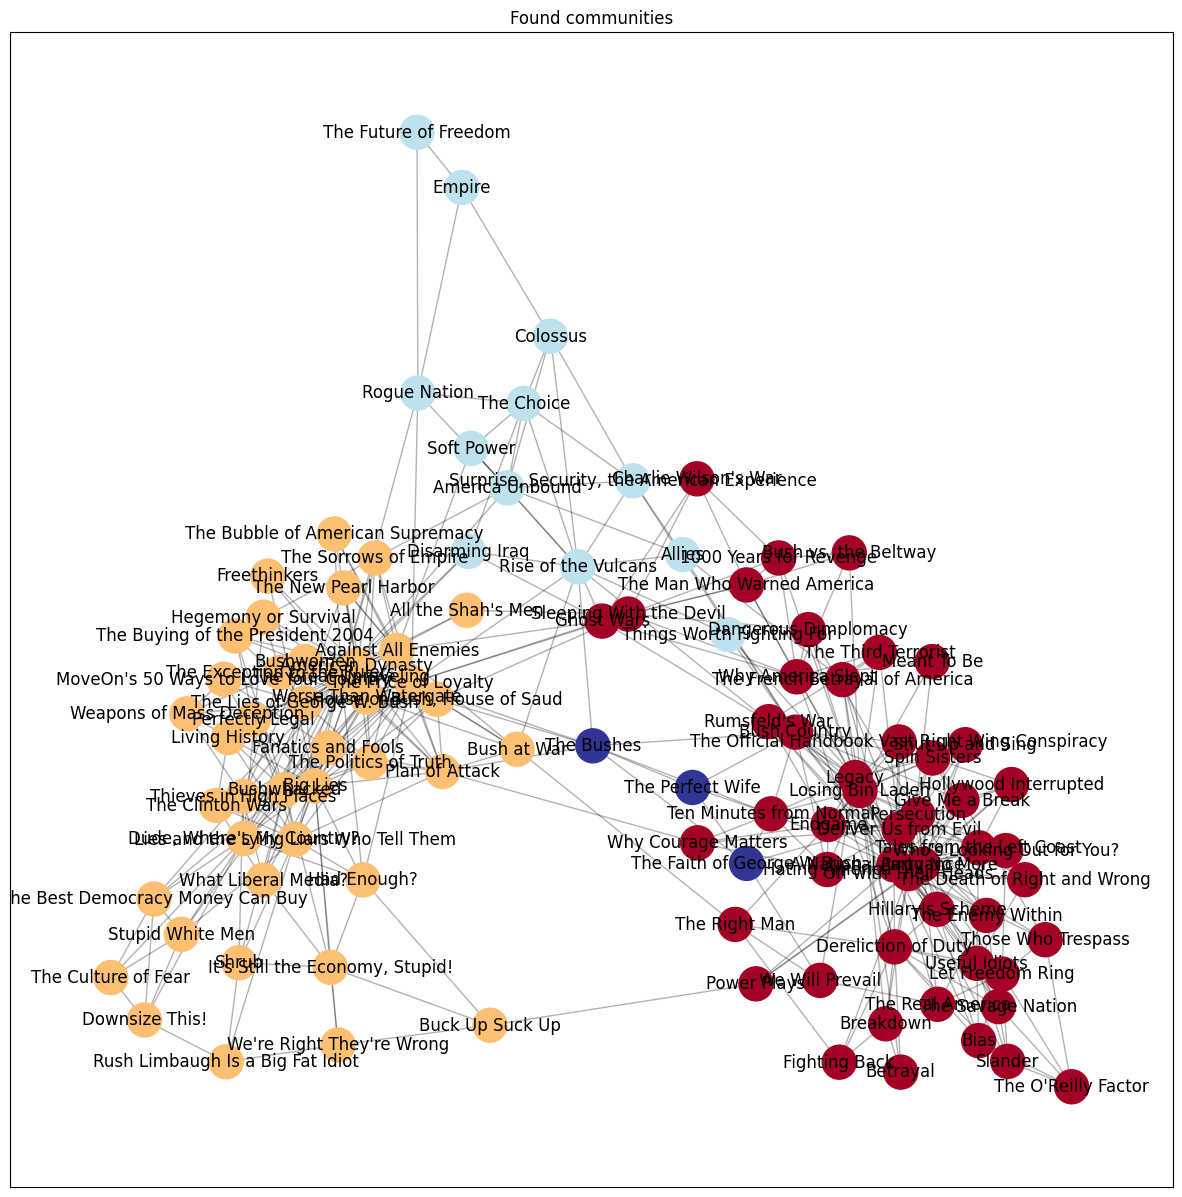

Fitness:  0.5019744859395006


In [6]:
main_f("communityDetection/data/krebs/krebs.gml", nxq.modularity)

[frozenset({1061, 1239, 1271, 3313, 1285, 1290, 3326, 1301, 3337, 3340, 3347, 3355, 1323, 3360, 1329, 3365, 1330, 3368, 3370, 2661, 2662, 2665, 2667, 2668, 2671, 2672, 2674, 2675, 2677, 2678, 1346, 2682, 2684, 2685, 2686, 2687, 2688, 2690, 2691, 2692, 2693, 2696, 2697, 2700, 2701, 2702, 3386, 2707, 2708, 2709, 2711, 2712, 2713, 2714, 2715, 2716, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2727, 2728, 2730, 2732, 2733, 2734, 2735, 2736, 2737, 2739, 2742, 2744, 2747, 2748, 2751, 2752, 2753, 2758, 2759, 2760, 2762, 2764, 2765, 2768, 2770, 2771, 2772, 2775, 2776, 2778, 2779, 2780, 2781, 3402, 2783, 2784, 2785, 3403, 2787, 2788, 2790, 2791, 2792, 2793, 2795, 2796, 2797, 3405, 2799, 2801, 2802, 2803, 2804, 2805, 2808, 2811, 2812, 2813, 2816, 2818, 2819, 2820, 2822, 2823, 2824, 2825, 2826, 2828, 2829, 2830, 2831, 2832, 2833, 2836, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2853, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2863, 2865, 2868, 2869, 2870, 2871, 2875, 2876, 2878

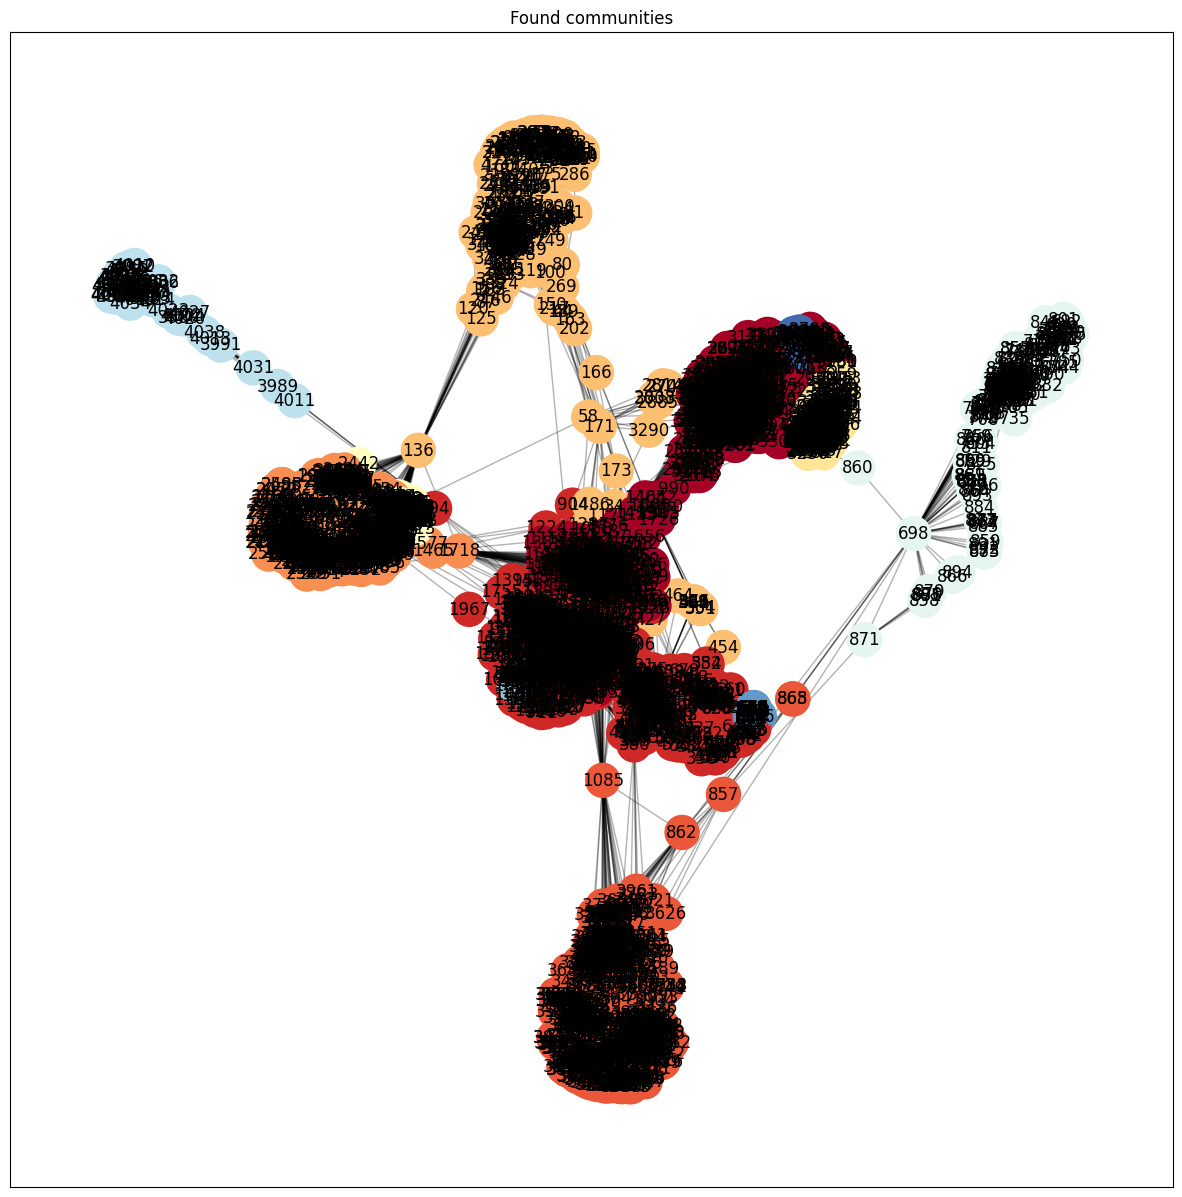

Fitness:  0.7773775199040279


In [7]:
main_f("communityDetection/data/facebook.gml", nxq.modularity)

[frozenset({8193, 22530, 8198, 4102, 12296, 6154, 24587, 10251, 6156, 18445, 8206, 14351, 18447, 24592, 8211, 4117, 14357, 12311, 18457, 26, 8219, 8222, 16414, 8224, 14371, 20515, 20517, 24614, 8231, 4135, 14377, 16429, 20526, 6190, 12337, 20533, 20536, 18489, 20538, 62, 14403, 22598, 6219, 22603, 2127, 18511, 80, 12369, 22609, 16469, 18517, 12373, 16471, 16485, 12389, 2155, 18540, 16495, 8305, 16498, 4211, 18549, 6264, 2169, 16506, 122, 2182, 135, 10376, 16521, 141, 10381, 4242, 14485, 10391, 4249, 24731, 24734, 14497, 10406, 20647, 22696, 22699, 6317, 4273, 18612, 183, 4283, 20668, 16576, 22721, 22722, 195, 14534, 8391, 4298, 20683, 205, 4301, 22734, 6351, 8408, 14559, 22758, 6376, 6380, 22771, 2293, 22778, 10490, 12545, 16644, 260, 2309, 8452, 22791, 14599, 6408, 8458, 16649, 16659, 6421, 14615, 14619, 10524, 14621, 14627, 18724, 2341, 22826, 22830, 2352, 18736, 18739, 2356, 24885, 14647, 10552, 18745, 10555, 2368, 4416, 12611, 6468, 18757, 14661, 18758, 4422, 4428, 16719, 2388, 187

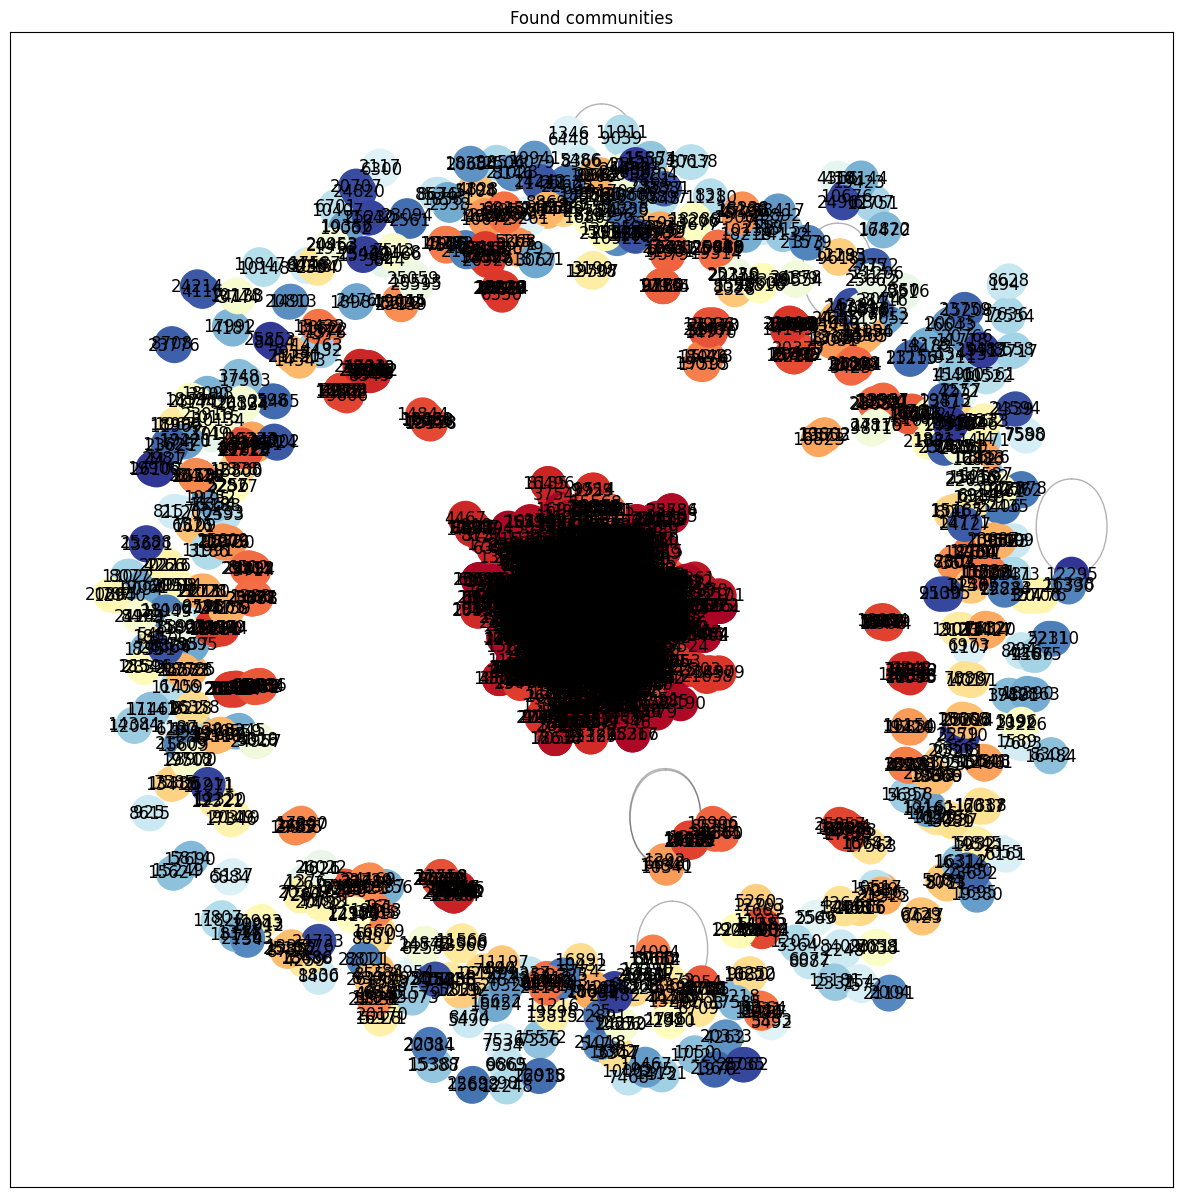

Fitness:  0.8198079658944767


In [9]:
main_f("communityDetection/data/ca-GrQc.gml", nxq.modularity)

In [ ]:
main_f("communityDetection/data/email-Eu-core.gml", nxq.modularity)

In [ ]:
main_f("communityDetection/data/p2p-Gnutella08.gml", nxq.modularity)

In [ ]:
main_f("communityDetection/data/p2p-Gnutella09.gml", nxq.modularity)

In [ ]:
main_f("communityDetection/data/wiki-Vote.gml", nxq.modularity)